In [18]:
import numpy as np

In [19]:
data = np.loadtxt("data.csv",delimiter=",")

In [20]:
data.shape

(100, 2)

In [21]:
x = data[:,0].reshape(-1,1)
y = data[:,1]
x.shape

(100, 1)

In [29]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)


In [23]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression()

In [24]:
classifier.coef_

array([1.4092529])

In [25]:
classifier.intercept_

3.708173655695049

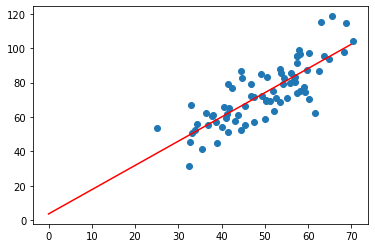

In [26]:
import matplotlib.pyplot as plt  
# y = mx+c
m = classifier.coef_[0]
c = classifier.intercept_

x_line = np.arange(0,70,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")
train_1d = x_train.reshape(75)
plt.scatter(x_train,y_train)
plt.show()

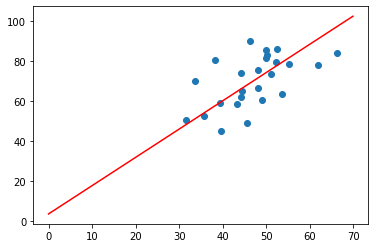

In [27]:
import matplotlib.pyplot as plt  
# y = mx+c
m = classifier.coef_[0]
c = classifier.intercept_

x_line = np.arange(0,70,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,"r")
train_1d = x_test.reshape(25)
plt.scatter(x_test,y_test)
plt.show()

In [30]:
X = data[:,0]
Y = data[:,1]
X.shape

(100,)

In [31]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)
X_train.shape

(75,)

In [32]:
def fit(X_train,Y_train):
    num = (X_train*Y_train).mean() - X_train.mean()*Y_train.mean()
    den = (X_train**2).mean() - X_train.mean()**2
    m = num/den
    c = Y_train.mean() - m* X_train.mean()
    return m,c

In [34]:
def predict(x,m,c):
    return m*x + c

In [37]:
def score(Y_truth,Y_pred):
    u = ((Y_truth - Y_pred)**2).sum()
    v = ((Y_truth - Y_truth.mean())**2).sum()
    return 1- u/v

In [43]:
m,c = fit(X_train, Y_train)
# test data
Y_test_pred = predict(X_test,m,c)
print(score(Y_test,Y_test_pred))

0.5886421823415441


In [42]:
# train data
Y_train_pred = predict(X_train,m,c)
print(score(Y_train,Y_train_pred))

0.5845445402606153


In [44]:
print(m,c)

1.2530722726863828 10.50176410657167
